In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv(r"C:\Users\John\Documents\data science projects\Kaggle - Spaceship Titanic\train.csv")
test_data = pd.read_csv(r"C:\Users\John\Documents\data science projects\Kaggle - Spaceship Titanic\test.csv")
test_data_copy = test_data.copy(deep = True)

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Check for nulls

In [5]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Categorical Data EDA

In [6]:
data_cat = data.select_dtypes(include = ('object','bool')).copy() ##explore categorical data

In [7]:
for category in data_cat:
    print(category , ' has ', data[category].nunique() , 'unique values')

PassengerId  has  8693 unique values
HomePlanet  has  3 unique values
CryoSleep  has  2 unique values
Cabin  has  6560 unique values
Destination  has  3 unique values
VIP  has  2 unique values
Name  has  8473 unique values
Transported  has  2 unique values


In [8]:
data_cat.drop(['PassengerId' , 'Name', 'Cabin'],axis =1 , inplace = True)

In [9]:
test_data.drop(['PassengerId' , 'Name', 'Cabin'],axis =1 , inplace = True)

Examine the frequencies of the categorical variables and add as hue the responce variable.

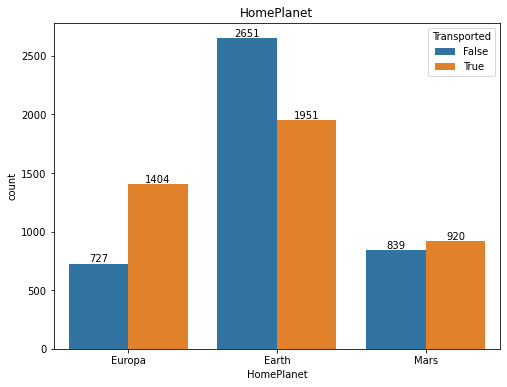

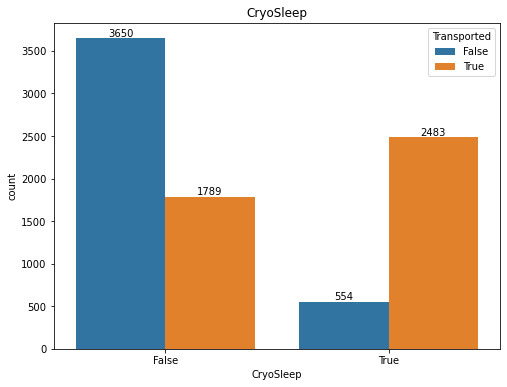

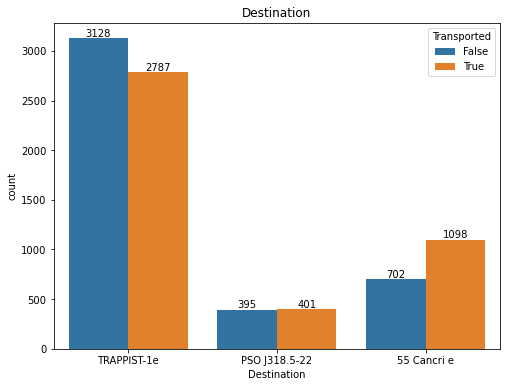

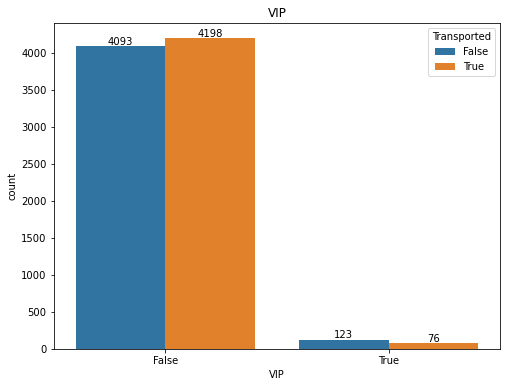

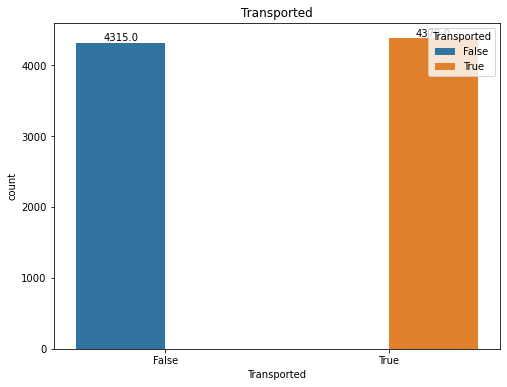

In [10]:
for category in data_cat:
    plt.figure(figsize = (8,6))
    ax = sns.countplot(data= data_cat , x=category, hue='Transported',palette = 'tab10' )
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    plt.title(category)
    plt.show()

From the above graphs we can deduce the following:
1. 'HomePlanet' has some correlation with the repose variable 'Transported'. 
It looks like 2/3 of the passengers from Europa were transported , and about 60% of Earths passengers were not transported.
2. 82% of passengers that were put in cryosleep where transported , so 'Cryosleep' variable is of high significance.
3. Destination and VIP variables dont look like they have much statistical significance , since for each outcome of the responce variable , these variable are very balanced.


Create contingency tables and check categorical feature importance

In [11]:
data_cat.drop('Transported' , axis = 1 , inplace = True)
for col in data_cat.columns:
    table = pd.crosstab(data_cat[col], data['Transported'])
    print()
    display(table)
    _, pval, _, expected_table = sp.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


p-value: 0.0000000000000000000000000



Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


p-value: 0.0000000000000000000000000



Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787


p-value: 0.0000000000000000000000079



Transported,False,True
VIP,,
False,4093,4198
True,123,76


p-value: 0.0006804064556968344784291


Add passenger id again. We will use it later to join the numeric and categorical datasets on this common column

In [12]:
data_cat['PassengerId'] = data['PassengerId']

Numerical Variable EDA


In [13]:
data_num = data.select_dtypes(include = ('float64')).copy() ##explore categorical data

In [14]:
data_num.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


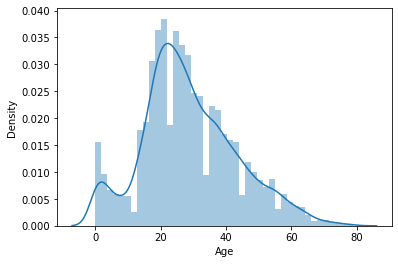

c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


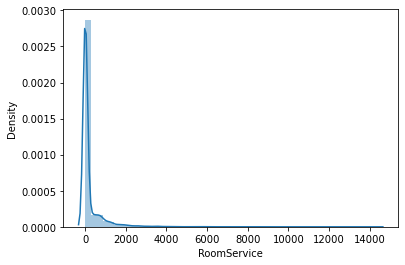

c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


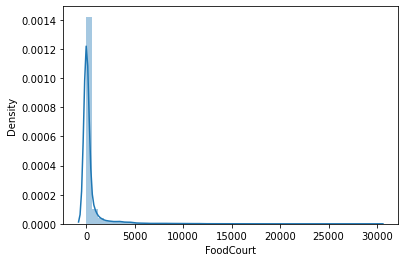

c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


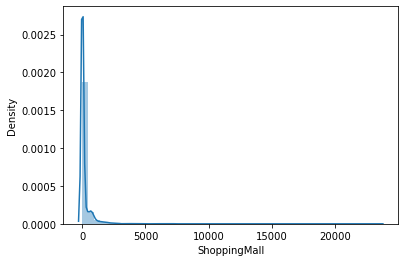

c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


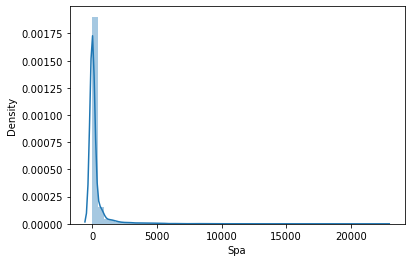

c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


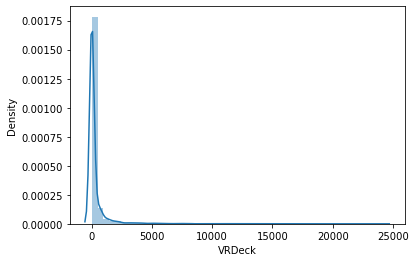

In [15]:
for column in data_num:
    sns.distplot(data_num[column])
    plt.show()

c:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


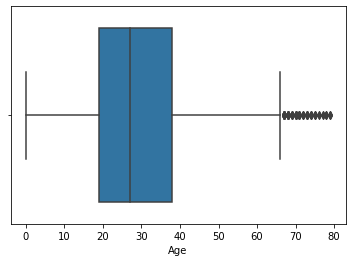

c:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


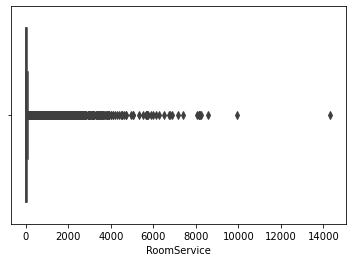

c:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


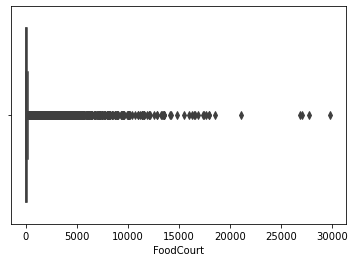

c:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


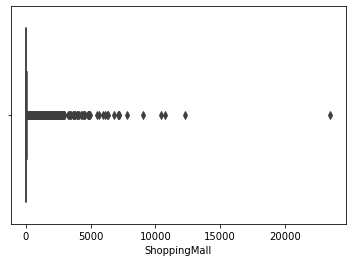

c:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


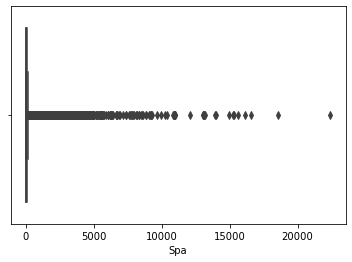

c:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


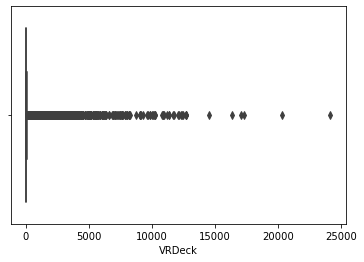

In [16]:
for column in data_num:
    sns.boxplot(data_num[column])
    plt.show()

All variables aside from age (which is not continuous variable) have outliers

In [17]:
data_num.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Add the respone variable to data_num

In [18]:
data_num['Transported']= data['Transported']

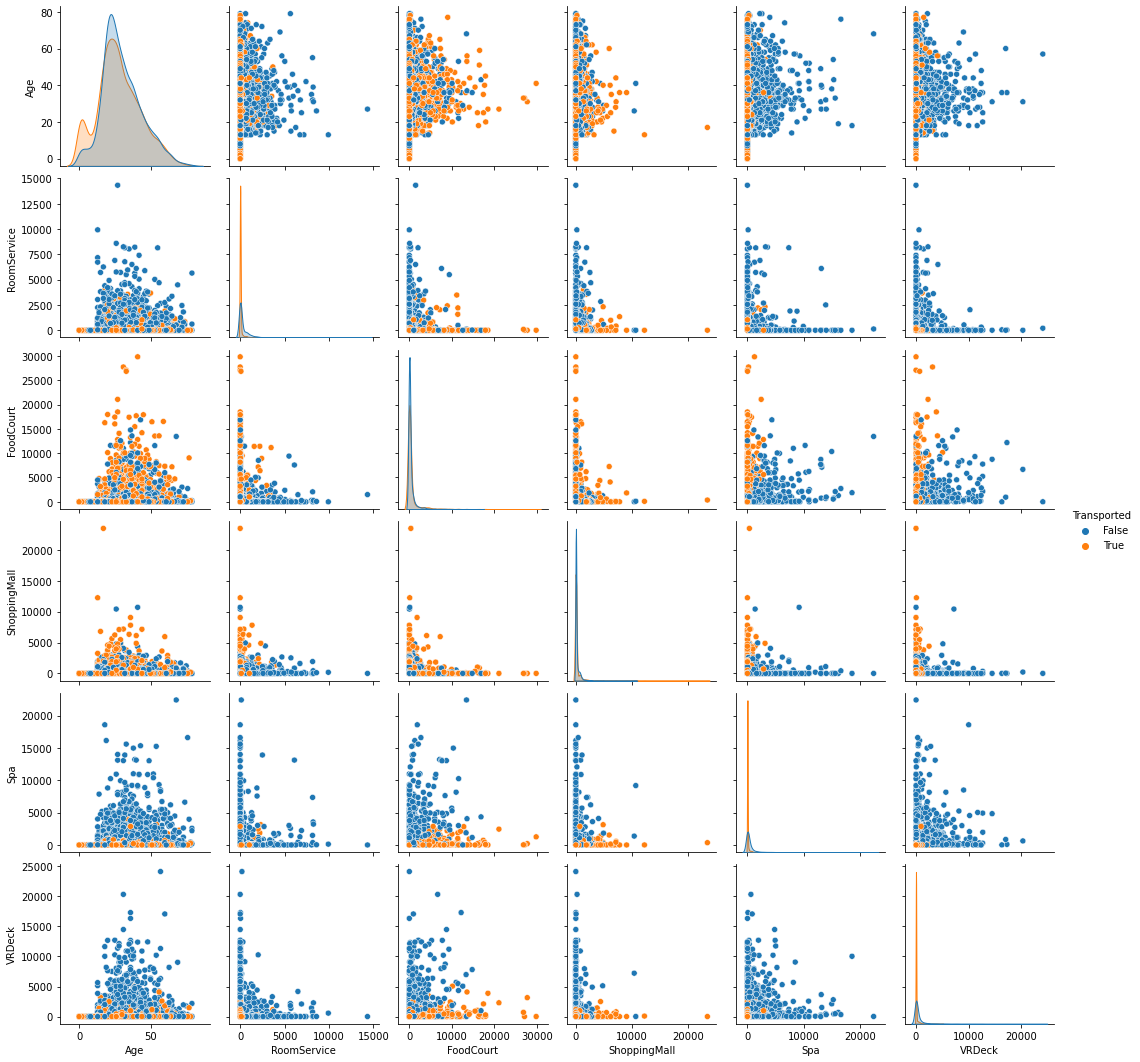

In [19]:
sns.pairplot(data = data_num , hue = 'Transported')
plt.show()

Check the correlation between the features and the respone variable

<AxesSubplot:>

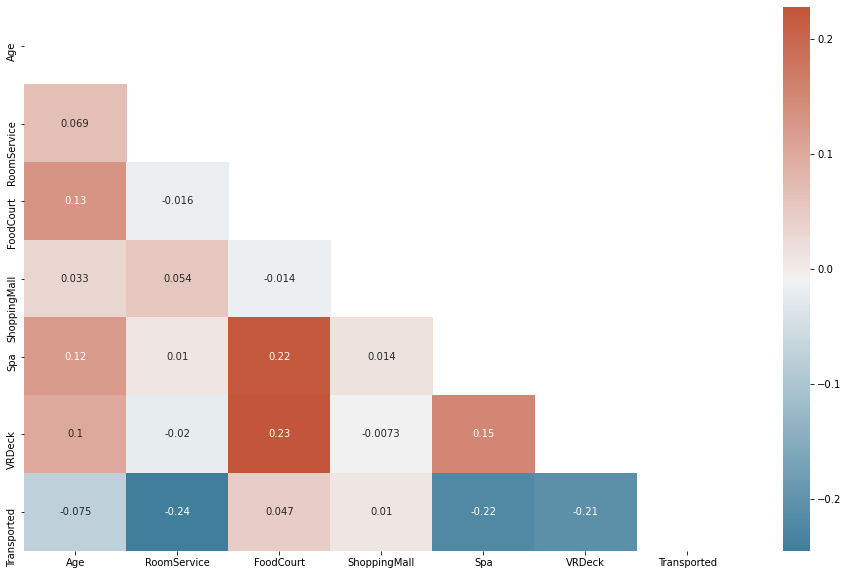

In [20]:
corr = data_num.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

The reponse variable is negatively correlated with Room Service , Spa , and VRDeck . Since those are considered premium features , it could be that Non VIPs are transported more often.

Now we drop the response variable from the data_num data , to prepare it for cleaning

In [21]:
data_num.drop('Transported' , axis =1 , inplace = True)

As mentioned earlier , we add the passenger id to join the 2 tables data_num and data_cat

In [22]:
data_num['PassengerId'] = data['PassengerId']

DATA CLEANING

We will start from the Categorical data features

In [23]:
data_cat.isnull().sum()

HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
PassengerId      0
dtype: int64

1. For Homeplanet we will replace nulls with the most common variable (MODE) which is earth
2. For CryoSleep we will replace the nulls with no. Therefore we make the assumption that if no entry was made , the subject was never put in CryoSleep.
3. For Destination we will replace nulls with the mode which is Trappist-1e
4. For VIP we will replace nulls with no , assuming that if no entries were made the passenger was not a VIP


In [24]:
data_cat['HomePlanet'].fillna('Earth' , inplace =True)
data_cat['CryoSleep'].fillna(False , inplace = True)
data_cat['Destination'].fillna('TRAPPIST-1e' , inplace = True)
data_cat['VIP'].fillna(False, inplace =True)

In [25]:
test_data['HomePlanet'].fillna('Earth' , inplace =True)
test_data['CryoSleep'].fillna(False , inplace = True)
test_data['Destination'].fillna('TRAPPIST-1e' , inplace = True)
test_data['VIP'].fillna(False, inplace =True)

In [26]:
data_cat.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
PassengerId    0
dtype: int64

Numerical Data Cleaning

In [27]:
data_num.isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
PassengerId       0
dtype: int64

We will use KNN imputation to replace the nulls in this section.

In [28]:
data_num.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [29]:
data_num.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'PassengerId'],
      dtype='object')

In [30]:
columns_to_use = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [31]:
def apply_imputation(df, columns, methods):
    knn_columns = [col for col in columns if methods[col] == 'knn']
    mean_columns = [col for col in columns if methods[col] == 'mean']

    for col in mean_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    if knn_columns:
        imputer = KNNImputer(n_neighbors=5)
        df[knn_columns] = imputer.fit_transform(df[knn_columns])

    return df

In [32]:
imputation_methods = {
    'Age': 'knn',
    'RoomService': 'knn',
    'FoodCourt': 'knn',
    'ShoppingMall': 'knn',
    'Spa': 'knn',
    'VRDeck': 'knn'
}

In [33]:
data_num_clean = apply_imputation(data_num , columns_to_use , imputation_methods )

In [34]:
test_data_clean = apply_imputation(test_data , columns_to_use , imputation_methods )

In [35]:
data_num.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerId     0
dtype: int64

Now we join the data_num , data_cat and the response variable to make the complete cleaned dataset.

In [36]:
data_clean = pd.merge(data_num , data_cat )

In [37]:
data_clean['Transported'] = data['Transported']

In [38]:
data_clean.drop('PassengerId' , axis = 1 , inplace = True)

Now that we have the full cleaned dataset we drop the passenger ID

Data Preprocessing

For categorical variables we will use One hot Encoding to transform them to boolean variables.

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
data_clean.dtypes

Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
HomePlanet       object
CryoSleep          bool
Destination      object
VIP                bool
Transported        bool
dtype: object

In [41]:
encoded_data = pd.get_dummies(data_clean , columns = ['HomePlanet', 'CryoSleep' , 'Destination' ,'VIP' ])

In [42]:
encoded_data.drop('Transported', axis = 1 , inplace = True)

In [43]:
encoded_test_data = pd.get_dummies(test_data_clean , columns = ['HomePlanet', 'CryoSleep' , 'Destination' ,'VIP' ])

Model Building

Train Test Split

We will split the encoded_data into a train and validation set and based on those we will draw assumptions.
The test set is provided without a response variable so we cant assess the model perfomance on it.


In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [45]:
X_train, X_val, y_train, y_val = train_test_split(encoded_data, data['Transported'], test_size=0.2, random_state=42)

# Display the shapes of the train and validation sets
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (6954, 16)
X_val shape: (1739, 16)
y_train shape: (6954,)
y_val shape: (1739,)


We will standarize the numerical columns

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(encoded_test_data)

# Convert scaled data back to DataFrame for clarity (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=encoded_test_data.columns)


Train the models

In [47]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Training and evaluating each classifier
model_results = {}
for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred_val = model.predict(X_val_scaled)
    
    accuracy = accuracy_score(y_val, y_pred_val)
    model_results[name] = accuracy
    print(f"{name} Validation Accuracy: {accuracy:.4f}")

# Display all model results
print("\nModel Results (Validation Accuracy):")
for model_name, accuracy in model_results.items():
    print(f"{model_name}: {accuracy:.4f}")

Logistic Regression Validation Accuracy: 0.7734


Random Forest Validation Accuracy: 0.7821
Decision Tree Validation Accuracy: 0.7205
Extra Trees Validation Accuracy: 0.7798
HistGradientBoosting Validation Accuracy: 0.7861
XGBoost Validation Accuracy: 0.7838
SVM Validation Accuracy: 0.7832
KNN Validation Accuracy: 0.7775
Naive Bayes Validation Accuracy: 0.7366

Model Results (Validation Accuracy):
Logistic Regression: 0.7734
Random Forest: 0.7821
Decision Tree: 0.7205
Extra Trees: 0.7798
HistGradientBoosting: 0.7861
XGBoost: 0.7838
SVM: 0.7832
KNN: 0.7775
Naive Bayes: 0.7366


Choose the model with the best Accuracy

In [48]:
best_model_name = max(model_results, key=model_results.get)
best_model = classifiers[best_model_name]


print(f"\nBest Model: {best_model_name} with Validation Accuracy: {model_results[best_model_name]:.4f}")


y_pred_best = best_model.predict(X_val_scaled)
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_val, y_pred_best))


Best Model: HistGradientBoosting with Validation Accuracy: 0.7861

Classification Report for HistGradientBoosting:
              precision    recall  f1-score   support

       False       0.81      0.74      0.77       861
        True       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



Finaly make the predictions on the test setand export the csv

In [49]:
# Make predictions on the test data using the best model
y_test_pred = best_model.predict(X_test_scaled)

# Convert the predictions back to the original format (True/False)
y_test_pred_final = pd.Series(y_test_pred).map({1: True, 0: False})

In [50]:
submission = pd.DataFrame({
    'PassengerId': test_data_copy['PassengerId'],
    'Transported': y_test_pred_final
})

submission.to_csv()

',PassengerId,Transported\r\n0,0013_01,\r\n1,0018_01,\r\n2,0019_01,\r\n3,0021_01,\r\n4,0023_01,\r\n5,0027_01,\r\n6,0029_01,\r\n7,0032_01,\r\n8,0032_02,\r\n9,0033_01,\r\n10,0037_01,\r\n11,0040_01,\r\n12,0040_02,\r\n13,0042_01,\r\n14,0046_01,\r\n15,0046_02,\r\n16,0046_03,\r\n17,0047_01,\r\n18,0047_02,\r\n19,0047_03,\r\n20,0048_01,\r\n21,0049_01,\r\n22,0054_01,\r\n23,0054_02,\r\n24,0054_03,\r\n25,0055_01,\r\n26,0057_01,\r\n27,0059_01,\r\n28,0060_01,\r\n29,0063_01,\r\n30,0065_01,\r\n31,0075_01,\r\n32,0079_01,\r\n33,0080_01,\r\n34,0083_01,\r\n35,0087_01,\r\n36,0089_01,\r\n37,0093_01,\r\n38,0094_01,\r\n39,0094_02,\r\n40,0095_01,\r\n41,0096_01,\r\n42,0100_01,\r\n43,0100_02,\r\n44,0104_01,\r\n45,0106_01,\r\n46,0109_01,\r\n47,0117_01,\r\n48,0118_01,\r\n49,0121_01,\r\n50,0124_01,\r\n51,0125_01,\r\n52,0125_02,\r\n53,0130_01,\r\n54,0131_01,\r\n55,0132_01,\r\n56,0135_01,\r\n57,0137_01,\r\n58,0142_01,\r\n59,0142_02,\r\n60,0142_03,\r\n61,0143_01,\r\n62,0145_01,\r\n63,0150_01,\r\n64,0150_02,\r\n65,015